# Exercise 7
## Time Series Analysis & Recurrent Neural Networks, SoSe 2021
### Author: Elias Olofsson
    Version information:
        2021-06-09: v.1.0. First public release. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.rc('image', cmap='gray')
from pprint import pprint
from scipy.special import factorial

# Notebook graphics settings: 
%config InlineBackend.figure_format = 'svg'     # inline vector graphics
#%config InlineBackend.figure_format = 'png'    # inline vector graphics
#%config InlineBackend.figure_format = 'retina' # medium resolution png:s
plt.rcParams['figure.dpi'] = 200                # custom dpi setting png

## Task 1: Discrete-time non-linear dynamics - fixpoints and stability

In [2]:
def nonlinear_map(x, a, b):
    return a * x + b * np.tanh(x)

Generate 1st order return plots for the specified parameters sets.

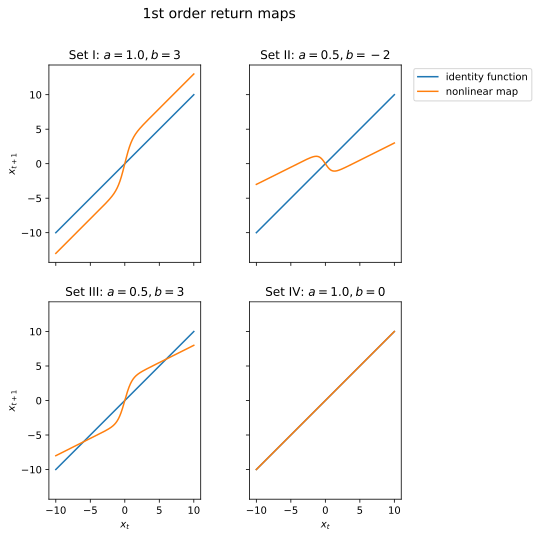

In [3]:
# Parameter sets I, II, III, IV
a = np.array([1, 0.5, 0.5, 1])
b = np.array([3, -2, 3, 0])    
sets = ['I', 'II', 'III', 'IV']

# Create subplot
nx, ny = (2, 2)
fig, ax = plt.subplots(ny, nx, figsize=(3.3*nx, 4*ny), sharex=True, sharey=True)
ax = ax.flatten()

x = np.linspace(-10, 10, 1000)
for i in range(len(a)):
    x_out = nonlinear_map(x, a[i], b[i]) 
    ax[i].plot(x, x, label='identity function')
    ax[i].plot(x, x_out, label='nonlinear map')
    if i >= (nx-1)*ny:
        ax[i].set_xlabel('$x_t$')
    if i%nx == 0:
        ax[i].set_ylabel('$x_{t+1}$')
    
    ax[i].set_title(f'Set {sets[i]}: $a={a[i]}, b={b[i]}$')
    ax[i].set_aspect('equal')
fig.suptitle('1st order return maps', fontsize=14)
ax[1].legend(loc='center left', bbox_to_anchor=(1.05, 0.9))
#plt.tight_layout()
plt.show()

Since fixpoints are indicated by intersections between the non-linear map and the identity function (bisectrix), and fixpoint stability can be determined by the local slope at the fixpoint ($|f'(x^*)| < 1$ for a stable fixpoint $x^*$), we can by visual inspection determine for each of the parameter sets:

 - I: A single fixpoint at $x=0$, unstable.
 - II: A single fixpoint at $x=0$, stable or unstable. Slope seems to be close to unity in absolute value, hard to tell.
 - III: Three fixpoints; stable, unstable and stable (going from left to right).
 - IV: 'Line attractor', i.e. all values $x \in \mathbb{R}$ are fixpoints.

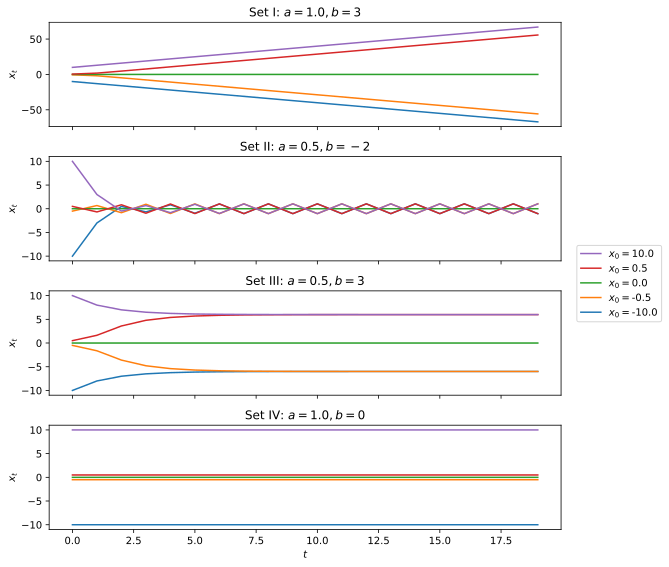

In [4]:
# Graph the system trajectory for all parameter sets from above, for a range of initial conditions.
x0 = np.array([-10, -0.5, 0, 0.5, 10])

T = 20 # max iterations
x = np.zeros((T, len(x0), len(a))) # pre-allocation
x[0] = np.tile(x0, (len(a), 1)).T  # set initial conditions

# Iterate in time
for t in range(1, T):
    x[t] = nonlinear_map(x[t-1], a, b)
time = np.arange(T)

# Plotting
fig, ax = plt.subplots(len(a), 1, figsize=(8, 8), sharex=True)
ax = ax.flatten()
for i in range(len(a)):
    line = ax[i].plot(time, x[:, :, i])
    ax[i].set_title(f'Set {sets[i]}: $a={a[i]}, b={b[i]}$')
    ax[i].set_ylabel('$x_t$')
ax[-1].set_xlabel('$t$')
fig.legend(reversed(line), reversed([f'$x_0 = ${i}' for i in x0]), loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()

As we reasoned above, we see some of the expected behaviour. From top to bottom:
 - I: The system is diverging for all $x$, except for precisely $x=0$ which is an unstable fixpoint.
 - II: We have a fixpoint at $x=0$, but there also seems to be a stable limit-cycle of period 2 which all  other states fall into. 
 - III: There's three fixpoints, one unstable fixpoint at $x=0$ and two stable at approximately $x =± 6$. All states except the one exactly at $x=0$ falls toward the closest of the two stable fixpoints.
 - IV: All states remain at their position for all time, regardless of initial condition. Thus all $x$ are fixpoints. 

To analyse the stability of the fixpoints, we need the first derivative of the non-linear map. This can simply be obtained as:

\begin{align}
    \frac{d x_{t+1}}{d x_t} = \frac{d}{dx_t} \left( a \cdot x_{t}+b \cdot \tanh \left(x_{t}\right) \right) = a + b (1 - \tanh^2(x_t))
\end{align}

In [5]:
def grad_nonlinear_map(x, a, b):
    return a + b * (1 - np.tanh(x)**2)

Set I  , fixpoint  0: x =   0.00, grad = 4.0
Set II , fixpoint  0: x =   0.00, grad = -1.5
Set III, fixpoint  0: x =  -6.00, grad = 0.50007
Set III, fixpoint  1: x =   0.00, grad = 3.5
Set III, fixpoint  2: x =   6.00, grad = 0.50007
Set IV , fixpoint  0: x = -10.00, grad = 1.0
Set IV , fixpoint  1: x =  -9.17, grad = 1.0
Set IV , fixpoint  2: x =  -8.33, grad = 1.0
Set IV , fixpoint  3: x =  -7.50, grad = 1.0
Set IV , fixpoint  4: x =  -6.67, grad = 1.0
Set IV , fixpoint  5: x =  -5.83, grad = 1.0
Set IV , fixpoint  6: x =  -5.00, grad = 1.0
Set IV , fixpoint  7: x =  -4.17, grad = 1.0
Set IV , fixpoint  8: x =  -3.33, grad = 1.0
Set IV , fixpoint  9: x =  -2.50, grad = 1.0
Set IV , fixpoint 10: x =  -1.67, grad = 1.0
Set IV , fixpoint 11: x =  -0.83, grad = 1.0
Set IV , fixpoint 12: x =   0.00, grad = 1.0
Set IV , fixpoint 13: x =   0.83, grad = 1.0
Set IV , fixpoint 14: x =   1.67, grad = 1.0
Set IV , fixpoint 15: x =   2.50, grad = 1.0
Set IV , fixpoint 16: x =   3.33, grad = 1.0
S

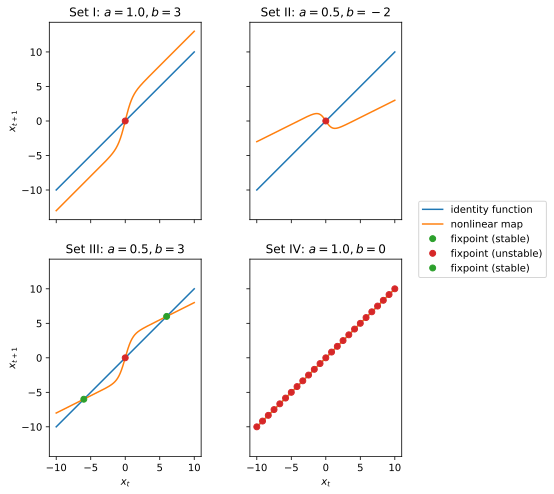

In [6]:
# Computing fixpoints numerically, and checking their stability analytically
from scipy.optimize import fsolve
tol = 1e-6 # max. allowed residual for fix points.

# Create subplot
nx, ny = (2, 2)
fig, ax = plt.subplots(ny, nx, figsize=(3.3*nx, 4*ny), sharex=True, sharey=True)
ax = ax.flatten()

x = np.linspace(-10, 10, 1000)
for i in range(len(a)):
    # Generate output for 1st order return plot.
    x_out = nonlinear_map(x, a[i], b[i]) 
    
    # Find all fixpoints.
    f      = lambda x: nonlinear_map(x, a[i], b[i]) - x 
    fprime = lambda x: grad_nonlinear_map(x, a[i], b[i]) - 1
    x_init  = np.linspace(-10, 10, 25)  # initial root guesses
    x_roots = np.zeros_like(x_init) # preallocation
    for j, x0 in enumerate(x_init): 
        x_roots[j] = fsolve(f, x0, fprime=fprime) # solve for the root numerically
    residuals   = f(x_roots)
    valid_roots = x_roots[np.abs(residuals) < tol] # filter out roots with high residuals    
    unique_fixpoints = np.unique(valid_roots.round(decimals=5)) # get unique roots
    
    # Visualize the return map, and the fixpoints.
    ax[i].plot(x, x, label='identity function')
    ax[i].plot(x, x_out, label='nonlinear map')
    for j, x_fix in enumerate(unique_fixpoints):
        grad_fix = grad_nonlinear_map(x_fix, a[i], b[i])
        print(f'Set {sets[i]:3}, fixpoint {j:2}: x = {x_fix:6.2f}, grad = {grad_fix:.5}')
        if np.abs(grad_fix) < 1:
            ax[i].plot(x_fix, x_fix, 'o', c='tab:green', label='fixpoint (stable)')
        else:
            ax[i].plot(x_fix, x_fix, 'o', c='tab:red', label='fixpoint (unstable)')
    if i >= (nx-1)*ny:
        ax[i].set_xlabel('$x_t$')
    if i%nx == 0:
        ax[i].set_ylabel('$x_{t+1}$')
    
    ax[i].set_title(f'Set {sets[i]}: $a={a[i]}, b={b[i]}$')
    ax[i].set_aspect('equal')
ax[2].legend(loc='center left', bbox_to_anchor=(2.4, 1.1))
plt.show()

Our intuitions from above seems to be correct, we have stable and unstable fixpoints where we expect them to be. For set II, the fixpoint had a gradient of -1.5, making it clearly unstable although it was a bit hard to tell initially by just visually estimating the slope. For the last set (IV), our algorithm marks all the points as unstable fixpoints, while they are actually neutrally stable with a gradient of unity, exactly. Normally one would need further investigation (higher Taylor expansion terms) to determine the stability of fixpoint with a first derivative equal to one, but since we know that the map completely overlaps with the bisectrix, we know that all $x \in \mathbb{R}$ belong to a set of (neutrally) stable fixpoints.

## Task 2: Training an RNN in PyTorch

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim

# comments GK:
    # some comments:
      # torch works with tensors (multidimensional arrays)
      # torch tensors have very similar functions as numpy objects
      # PyTorch allows flexible code and debugging
      # autograd (automatic gradient) keeps track of all gradients for you
      # PyTorch builds the network dynamically, allows you to change it also dynamically

In [8]:
T    = 10       # Length of time series
Tinp = 3        # Time at which the input is presented
Tout = [7]      # Time points at which the output is required
N    = 10       # Number of neurons
Ntrial = 6000   # Number of trials (i.e. # of batches)
alpha  = 0.1    # Learning rate
batchsize = 5   # How many trials per training step?
mapping = ['I', 'II']
activations = {'tanh': '$\\tanh$', 'relu': 'ReLU'}

In [9]:
def train_rnn(alpha=0.1, N=10, activation='tanh'):
    # Create 1 layer RNN with N neurons
    # Inputs to RNN: 
    # No. of input units, No. of total units, No. of layers, nonlinearity
    net = nn.RNN(N, N, 1, nonlinearity=activation)

    # Define the inputs for one trial:
    # Inputs to the RNN need to have 3 dimensions, where the first dimension is
    # the length of the time series, the second is the trial number and the third
    # is the number of the unit that receives the input. Here, we define the input
    # for one single trial, so we set the 2nd dimension to 1
    input1 = np.zeros([T, 1, N])
    input2 = np.zeros([T, 1, N])
    input1[Tinp, 0, 0] = 1   # Provide input to neuron 0
    input2[Tinp, 0, 1] = 1   # Provide input to neuron 1

    # Define the targets for a single trial
    target1 = np.zeros([T, 1, N])
    target2 = np.zeros([T, 1, N])
    for t in Tout:
        target1[t, 0, 2] = 1
        target2[t, 0, 3] = 1
    inputs  = {0: input1, 1: input2}
    targets = {0: target1, 1: target2}

    # We want to record losses for plotting
    losses = np.zeros(Ntrial)   
    # Define the loss function. We want to use mean square error function
    criterion = nn.MSELoss()
    for i in range(Ntrial):
        # First, stitch multiple input-target pairs together to one batch.
        # Notice that the trial number within one batch is given by the second
        # dimension of the input/target tensor!
        inpt   = torch.zeros(T, batchsize, N, dtype=torch.float)
        target = torch.zeros(T, batchsize, N, dtype=torch.float)
        for n in range(batchsize):
            # Draw randomly from either trial type 1 or trial type 2
            trial_type    = np.random.randint(0, 2)
            inpt[:,n,:]   = torch.tensor(inputs[trial_type], dtype=torch.float).squeeze()
            target[:,n,:] = torch.tensor(targets[trial_type], dtype=torch.float).squeeze()

        # To propagate input through the network, we simply call the network with
        # the input as argument. Output is the whole time series for all trials in
        # the batch
        [outp, _] = net(inpt)

        # Calculate MSE between output and target. Here we specifically select
        # those units (2 and 3) and time points (Tout) that have target outputs.
        loss = criterion(outp[Tout, :, 2:4], target[Tout, :, 2:4])
        losses[i] = loss

        # We need to reset the gradients from previous step to zero:
        net.zero_grad()

        # This function backpropagates the loss through the network. PyTorch takes 
        # care of calculating the gradients that are created by the backpropagation
        loss.backward()

        # Use the optimizer on the parameters, with learning rate alpha
        # We use stochastic gradient descent, but you can change it if you want:
        optimizer = optim.SGD(net.parameters(), lr=alpha)
        # Finally, do one gradient descent step:
        optimizer.step()


    # Now we plot the results. For that, we propagate both input types through the
    # network and plot the resulting time series
    fig, ax = plt.subplots(3, 1, figsize=(8, 6))
    ax = ax.flatten()

    ax[0].plot(losses, label='Training loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].set_title(f'Training progression')
    ax[0].legend()

    for i in range(2):
        inpt = torch.tensor(inputs[i], dtype=torch.float)
        [outp, _] = net(inpt)        # Propagate through the network
        outp = outp.detach().numpy() 

        x3 = np.squeeze(outp[:,0,2]) # Extract the 3rd neuron 
        x4 = np.squeeze(outp[:,0,3]) # Extract the 4th neuron

        # Plotting
        ax[i+1].plot(np.arange(T), np.zeros(T), 'k--', alpha=0.5)
        ax[i+1].plot(np.arange(T), np.ones(T), 'k--', alpha=0.5)
        ax[i+1].plot(np.arange(T), x3, label='Neuron 3 output')
        ax[i+1].plot(np.arange(T), x4, label='Neuron 4 output')
        ax[i+1].plot(Tout, targets[i][Tout, 0, 2], 'o', label='Neuron 3 target', color='tab:blue', markerfacecolor='none')
        ax[i+1].plot(Tout, targets[i][Tout, 0, 3], 'o', label='Neuron 4 target', color='tab:orange', markerfacecolor='none')
        ax[i+1].set_xlabel('Time')
        ax[i+1].set_ylabel('Activation')
        ax[i+1].set_title(f'Final network output when fed mapping {mapping[i]}')
        ax[i+1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    
    fig.suptitle(f'RNN: $N = {N}$, lr = {alpha}, {activations[activation]} activation.', 
                 x=0.43, y=0.98, horizontalalignment='center', verticalalignment='top', fontsize=15)
    plt.tight_layout()
    plt.show()

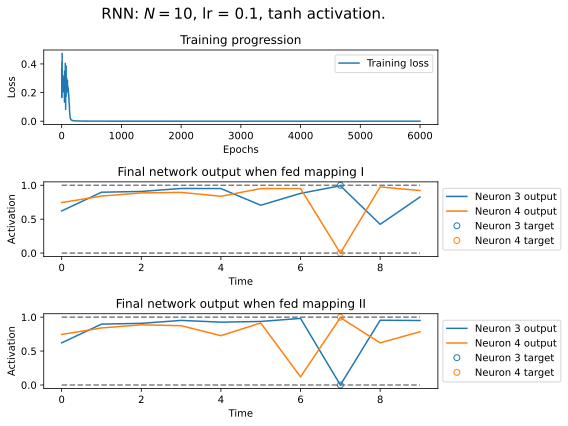

In [10]:
train_rnn(alpha=0.1, N=10, activation='tanh')

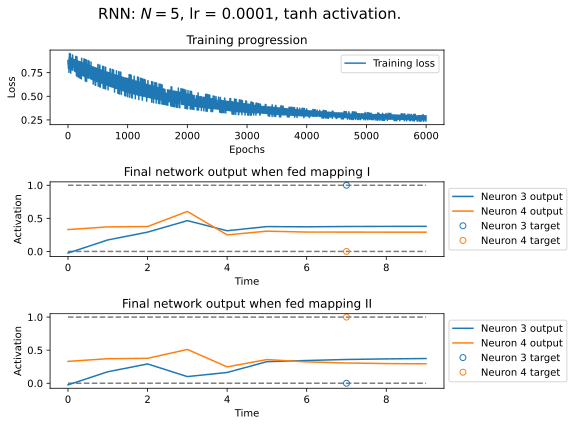

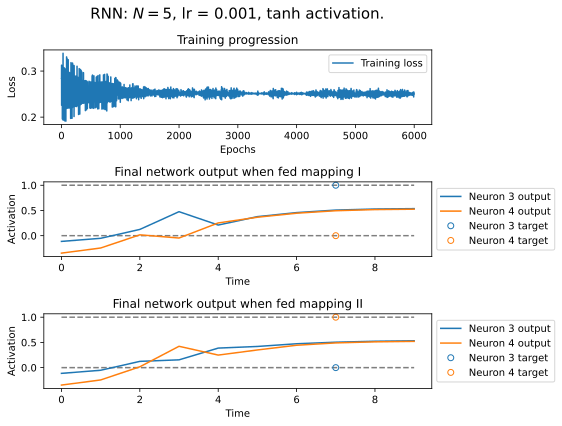

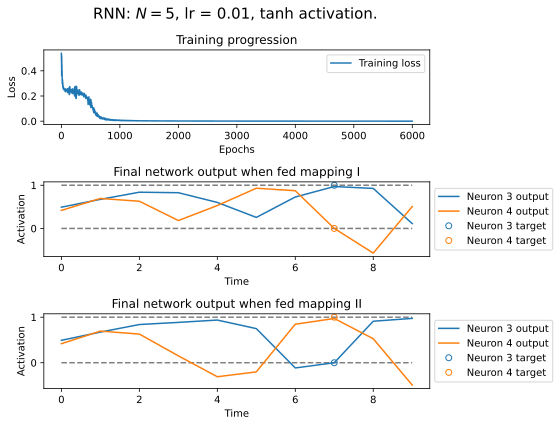

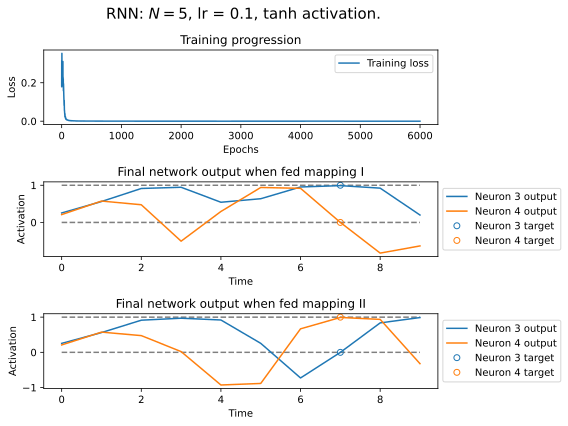

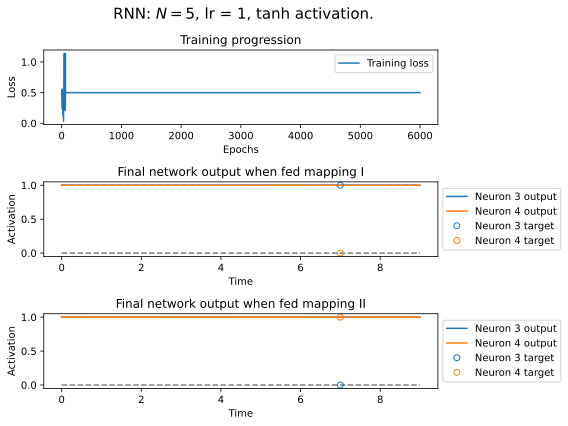

In [11]:
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1]
for alpha in alphas:
    train_rnn(alpha=alpha, N=5, activation='tanh')

For a network of $N=5$ neurons with $\tanh$-activation, the optimal (if fixed) learning rate seems to be around $\alpha \approx (0.01, 0.1)$ for our specific dataset. For higher learning rates than that, the network seems to take too large steps during the stochastic gradient descent which prevents us from arriving at a local optimum, since we constantly overshoot it. Conversly, if the learning rate is much lower, the algorithm takes to long time to arrive at the solution and does not "explore" much of the possible solution space, and thus we end up with a non-interesting solution. However, optimally we would implement a learning rate scheme which would gradually decrease the learning rate as we approach a local minimia, then we could possibly achieve the benefits of having both a high and a low learning rate.

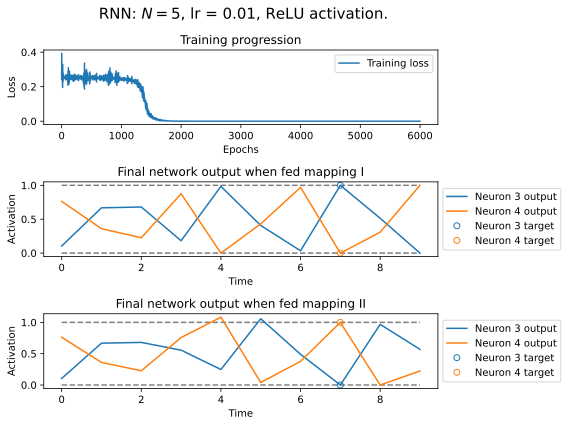

In [13]:
train_rnn(alpha=1e-2, N=5, activation='relu')

ReLU activation seemed quite comparable to $\tanh$ activation, but finding a suitable learning rate proved to be a bit harder with ReLU. Probably, this problem would be overcome by adapting a learning rate scheme instead of simply using a fixed learning rate. Also, for all of these training sessions, the training should have been stopped way earlier than the full 6000 epochs. Since if training is continued while the loss halts its decrease, the network is just starting to overfit the training data, which is highly undesirable.